In [3]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10 32x32x3

# Normalize pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train =  tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H = 200
std=1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

batch_size = Ntr

iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6

testing_loss_history = []
training_loss_history = []
testing_acc_history = []
training_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

indices = np.arange(Ntr)

for t in range(iterations):
    rng.shuffle(indices)#Shuffling the dataset
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    h =1.0/(1.0 + np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2) + b2
    h_test = 1.0/(1.0 + np.exp(-(x_test.dot(w1)+b1)))
    y_test_pred = h_test.dot(w2)+b2

    testing_loss=1./Nte*(np.square(y_test_pred-y_test)).sum() + reg * np.sum(w1*w1)
    training_loss=1./batch_size*(np.square(y_pred-y)).sum() + reg * np.sum(w1*w1)
    testing_loss_history.append(testing_loss)
    training_loss_history.append(training_loss)

    training_acc = 1.0 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum()
    training_acc_history.append(training_acc)
    testing_acc = 1.0 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_test_pred,axis=1))).sum()
    testing_acc_history.append(testing_acc)

    if t%10==0:
        print('epoch = ', t, ' train loss = ', training_loss ,' test loss =  ', testing_loss, ' train accuracy = ', training_loss, 'test accuracy = ', testing_acc)

    # Backward pass

    dy_pred = 1./batch_size*2.0*(y_pred-y)#partial differentiation
    dw2 = h.T.dot(dy_pred) + reg * w2
    db2 = dy_pred.sum(axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h))+reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0) 

    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay



170500096/170498071 [==============================] - 4s 0us/step
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
epoch =  0  train loss =  0.9999811606351017  test loss =   0.9999811248277601  train accuracy =  0.9999811606351017 test accuracy =  0.73
epoch =  10  train loss =  0.8671377849822048  test loss =   0.8668610935539073  train accuracy =  0.8671377849822048 test accuracy =  0.71499
epoch =  20  train loss =  0.8405658302429574  test loss =   0.840465247700496  train accuracy =  0.8405658302429574 test accuracy =  0.7239
epoch =  30  train loss =  0.8288094624582408  test loss =   0.8291386350147658  train accuracy =  0.8288094624582408 test accuracy =  0.73463
epoch =  40  train loss =  0.8192269047819317  test loss =   0.8199584471936057  train accuracy =  0.8192269047819317 test accuracy =  0.7437499999999999
epoch =  50  train loss =  0.8115613167102061  test loss =   0.8126923477356217  train accuracy =  0.8115613167102061 test accuracy =  0.75864
epoch =  60  train 

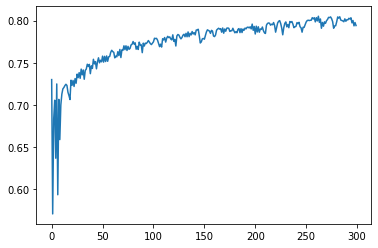

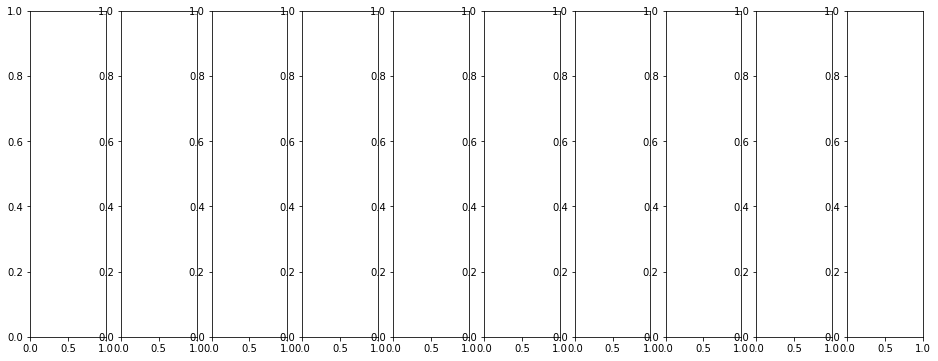

In [7]:
import matplotlib.pyplot as plt

plt.plot(training_acc_history)
f, axarr = plt.subplots(1, 10)
f.set_size_inches(16, 6)